In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

# 1. Load Data

In [3]:
phish = pd.read_csv("../data/feature_engineered_data.csv")
phish.head()

,type,url_length,domain_length,domain_entropy,is_common_tld,shortening_service,is_https,is_http,special_characters,sensitive_words,file_extension,suspicious_query
0,2,16,16,3.375000,0,0,0,0,0,0,0,0
1,0,35,11,3.277613,1,0,0,0,0,0,5,0
2,0,31,14,3.235926,1,0,0,0,0,0,5,0
3,1,88,21,3.308751,1,0,0,1,7,0,5,0
4,1,235,23,3.501398,1,0,0,1,5,0,5,0


In [4]:
phish.tail()

,type,url_length,domain_length,domain_entropy,is_common_tld,shortening_service,is_https,is_http,special_characters,sensitive_words,file_extension,suspicious_query
641120,2,39,15,3.506891,1,1,0,0,0,0,5,0
641121,2,44,18,3.350209,1,1,0,0,0,0,0,0
641122,2,42,16,3.327820,1,1,0,0,0,0,0,0
641123,2,45,16,3.452820,1,0,0,0,0,0,0,0
641124,2,41,17,3.572469,1,0,0,0,0,0,0,0


# 2. Analyze Data

In [5]:
phish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641125 entries, 0 to 641124
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   type                641125 non-null  int64  
 1   url_length          641125 non-null  int64  
 2   domain_length       641125 non-null  int64  
 3   domain_entropy      641125 non-null  float64
 4   is_common_tld       641125 non-null  int64  
 5   shortening_service  641125 non-null  int64  
 6   is_https            641125 non-null  int64  
 7   is_http             641125 non-null  int64  
 8   special_characters  641125 non-null  int64  
 9   sensitive_words     641125 non-null  int64  
 10  file_extension      641125 non-null  int64  
 11  suspicious_query    641125 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 58.7 MB


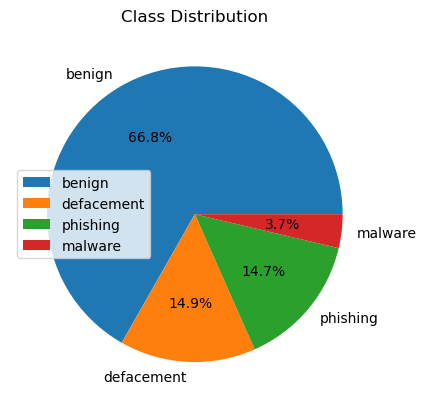

In [6]:
plt.pie(phish['type'].value_counts(), labels=['benign', 'defacement','phishing','malware'], autopct='%1.1f%%')
plt.title('Class Distribution')
plt.legend()
plt.show()

In [7]:
phish['type'].value_counts()

type
0    428080
1     95308
2     94092
3     23645
Name: count, dtype: int64

## 3. Data Processing

In [8]:
phish.isna().sum()

type                  0
url_length            0
domain_length         0
domain_entropy        0
is_common_tld         0
shortening_service    0
is_https              0
is_http               0
special_characters    0
sensitive_words       0
file_extension        0
suspicious_query      0
dtype: int64

In [9]:
# Remove duplicates
#phish = phish.drop_duplicates()

## Check for missing values and drop rows with missing values if necessary
#phish = phish.dropna()

## Verify the cleaned data
#phish.info()

In [10]:
phish['type'].value_counts()

type
0    428080
1     95308
2     94092
3     23645
Name: count, dtype: int64

## 4. Feature Selection

### 4.1 Function to extract features from URLs

###  Feature Importance Evaluation

In [11]:
from sklearn.model_selection import train_test_split
X= phish.drop('type', axis=1)
y = phish['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,url_length,domain_length,domain_entropy,is_common_tld,shortening_service,is_https,is_http,special_characters,sensitive_words,file_extension,suspicious_query
498865,55,16,3.250000,1,0,0,0,0,0,0,0
615464,36,13,3.026987,1,0,0,0,0,0,0,0
594082,33,22,3.629220,1,0,0,0,0,0,5,0
519940,29,16,3.327820,0,0,1,0,0,1,0,0
171274,44,11,3.095795,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395779,36,19,3.286629,0,0,0,1,0,0,5,0
508594,38,10,3.121928,1,0,0,0,0,0,5,0
484742,63,13,3.180833,1,0,0,1,0,0,5,0
275117,89,9,2.725481,0,1,0,1,0,0,0,0


## Machine Learning

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

classifier = RandomForestClassifier(class_weight="balanced", random_state=42, n_estimators=200)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [13]:
print(
    f"Accuracy with Random Forest Classifier: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report with Random Forest Classifier:")
print(classification_report(y_test, y_pred))

Accuracy with Random Forest Classifier: 0.9192
Classification Report with Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     85836
           1       0.95      0.98      0.97     19056
           2       0.72      0.77      0.74     18633
           3       0.94      0.92      0.93      4700

    accuracy                           0.92    128225
   macro avg       0.89      0.90      0.90    128225
weighted avg       0.92      0.92      0.92    128225



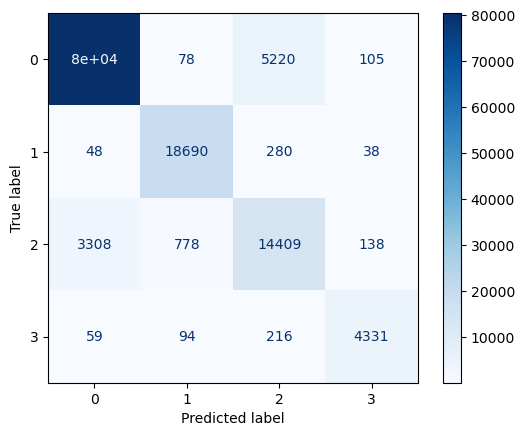

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Saving model

In [15]:
import pickle

# Save the model to a file
pickle.dump(classifier, open(f'../reports/random_forest_classifier.pkl', 'wb'))


##